# mulitiple liner regreesion

In [1]:
import warnings
warnings.simplefilter('ignore')

In [2]:
import numpy as np
import pandas as pd

In [4]:
import matplotlib.pyplot as pt

In [5]:
%matplotlib inline

In [8]:
SR=pd.read_csv("Admission_Predict (1).csv")

In [9]:
SR

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,Yes,0.92
1,2,324,107,4,4.0,4.5,8.87,Yes,0.76
2,3,316,104,3,3.0,3.5,8.00,Yes,0.72
3,4,322,110,3,3.5,2.5,8.67,Yes,0.80
4,5,314,103,2,2.0,3.0,8.21,No,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,Yes,0.82
396,397,325,107,3,3.0,3.5,9.11,Yes,0.84
397,398,330,116,4,5.0,4.5,9.45,Yes,0.91
398,399,312,103,3,3.5,4.0,8.78,No,0.67


# importing dataset

In [10]:
dataset = pd.read_csv("Admission_Predict (1).csv")

In [11]:
dataset 

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,Yes,0.92
1,2,324,107,4,4.0,4.5,8.87,Yes,0.76
2,3,316,104,3,3.0,3.5,8.00,Yes,0.72
3,4,322,110,3,3.5,2.5,8.67,Yes,0.80
4,5,314,103,2,2.0,3.0,8.21,No,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,Yes,0.82
396,397,325,107,3,3.0,3.5,9.11,Yes,0.84
397,398,330,116,4,5.0,4.5,9.45,Yes,0.91
398,399,312,103,3,3.5,4.0,8.78,No,0.67


In [23]:
SR.shape

(400, 9)

In [24]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    object 
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(3), object(1)
memory usage: 25.1+ KB


In [12]:
dataset .head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,Yes,0.92
1,2,324,107,4,4.0,4.5,8.87,Yes,0.76
2,3,316,104,3,3.0,3.5,8.00,Yes,0.72
3,4,322,110,3,3.5,2.5,8.67,Yes,0.80
4,5,314,103,2,2.0,3.0,8.21,No,0.65


In [ ]:
SR 

In [19]:
dataset = SR.drop(['Serial No.'],axis=1)

In [20]:
dataset

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,Yes,0.92
1,324,107,4,4.0,4.5,8.87,Yes,0.76
2,316,104,3,3.0,3.5,8.00,Yes,0.72
3,322,110,3,3.5,2.5,8.67,Yes,0.80
4,314,103,2,2.0,3.0,8.21,No,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,Yes,0.82
396,325,107,3,3.0,3.5,9.11,Yes,0.84
397,330,116,4,5.0,4.5,9.45,Yes,0.91
398,312,103,3,3.5,4.0,8.78,No,0.67


In [21]:
x=dataset.iloc[:,:-2].values
y=dataset.iloc[:,-1].values

In [31]:
x

array([[337.  , 118.  ,   4.  ,   4.5 ,   4.5 ,   9.65],
       [324.  , 107.  ,   4.  ,   4.  ,   4.5 ,   8.87],
       [316.  , 104.  ,   3.  ,   3.  ,   3.5 ,   8.  ],
       ...,
       [330.  , 116.  ,   4.  ,   5.  ,   4.5 ,   9.45],
       [312.  , 103.  ,   3.  ,   3.5 ,   4.  ,   8.78],
       [333.  , 117.  ,   4.  ,   5.  ,   4.  ,   9.66]])

In [32]:
y

array([0.92, 0.76, 0.72, 0.8 , 0.65, 0.9 , 0.75, 0.68, 0.5 , 0.45, 0.52,
       0.84, 0.78, 0.62, 0.61, 0.54, 0.66, 0.65, 0.63, 0.62, 0.64, 0.7 ,
       0.94, 0.95, 0.97, 0.94, 0.76, 0.44, 0.46, 0.54, 0.65, 0.74, 0.91,
       0.9 , 0.94, 0.88, 0.64, 0.58, 0.52, 0.48, 0.46, 0.49, 0.53, 0.87,
       0.91, 0.88, 0.86, 0.89, 0.82, 0.78, 0.76, 0.56, 0.78, 0.72, 0.7 ,
       0.64, 0.64, 0.46, 0.36, 0.42, 0.48, 0.47, 0.54, 0.56, 0.52, 0.55,
       0.61, 0.57, 0.68, 0.78, 0.94, 0.96, 0.93, 0.84, 0.74, 0.72, 0.74,
       0.64, 0.44, 0.46, 0.5 , 0.96, 0.92, 0.92, 0.94, 0.76, 0.72, 0.66,
       0.64, 0.74, 0.64, 0.38, 0.34, 0.44, 0.36, 0.42, 0.48, 0.86, 0.9 ,
       0.79, 0.71, 0.64, 0.62, 0.57, 0.74, 0.69, 0.87, 0.91, 0.93, 0.68,
       0.61, 0.69, 0.62, 0.72, 0.59, 0.66, 0.56, 0.45, 0.47, 0.71, 0.94,
       0.94, 0.57, 0.61, 0.57, 0.64, 0.85, 0.78, 0.84, 0.92, 0.96, 0.77,
       0.71, 0.79, 0.89, 0.82, 0.76, 0.71, 0.8 , 0.78, 0.84, 0.9 , 0.92,
       0.97, 0.8 , 0.81, 0.75, 0.83, 0.96, 0.79, 0.

In [22]:
from sklearn.model_selection import train_test_split

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.2,random_state=0)

In [27]:
x_train.shape

(80, 6)

In [28]:
y_train.shape

(80,)

In [29]:
x_test.shape

(320, 6)

In [30]:
y_test.shape

(320,)

In [33]:
from sklearn.linear_model import LinearRegression

# apply linear

In [34]:
lm= LinearRegression()

In [35]:
lm.fit(x_train,y_train)

LinearRegression()

In [36]:
y_predict=lm.predict(x_test)

In [37]:
y_predict

array([0.70787596, 0.70828835, 0.76793339, 0.62054071, 0.72981981,
       0.60085949, 0.71966915, 0.64703569, 0.86336659, 0.91642696,
       0.55070169, 0.88085684, 0.717373  , 0.45782456, 0.84704895,
       0.63055302, 0.59603543, 0.79651887, 0.58004324, 0.7387842 ,
       0.87682417, 0.85983155, 0.67271055, 0.45676059, 0.77178482,
       0.58102121, 0.46549101, 0.64675293, 0.88962463, 0.6529101 ,
       0.61936921, 0.72548683, 0.72507945, 0.55471942, 0.80131189,
       0.76589075, 0.63274441, 0.85569113, 0.63332021, 0.92268461,
       0.71250519, 0.68399273, 0.70197051, 0.79290549, 0.85086138,
       0.67239855, 0.57536297, 0.70721533, 0.61893838, 0.60241506,
       0.68106599, 0.79270356, 0.62819951, 0.88311523, 0.69480846,
       0.74793973, 0.70796625, 0.71920778, 0.769469  , 0.81574179,
       0.7831052 , 0.46705911, 0.64478484, 0.5209821 , 0.83498043,
       0.80803042, 0.7340559 , 0.86193869, 0.7811036 , 0.73594287,
       0.60048438, 0.81167342, 0.81400223, 0.5949079 , 0.93426

# visualizaing the regreessor

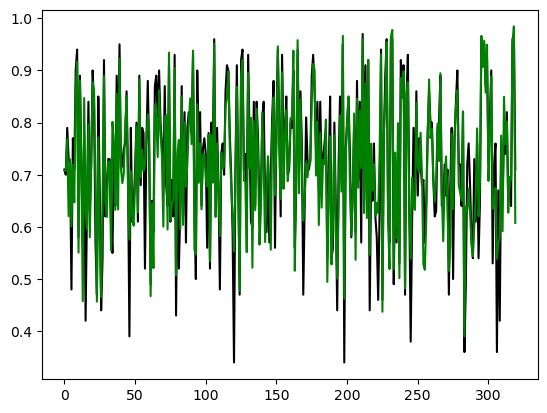

In [41]:
pt.plot(y_test,color='black')
pt.plot(y_predict,color='green')

In [45]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [46]:
 mean_squared_error(y_test,y_predict)

0.004181742697755811

In [47]:
r2_score(y_test,y_predict)

0.7829834535002997

In [48]:
lm.score(x,y)

0.7966152989389558